<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Projeto2Marcelounb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


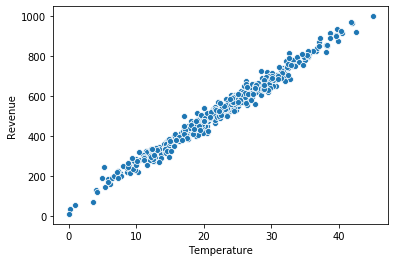

In [20]:
arquivo = pd.read_csv('/content/SalesData.csv')
arquivo.reset_index(inplace=True, drop=True)
arquivo.info()
arquivo.describe()
sns.scatterplot(arquivo['Temperature'], arquivo['Revenue'])

In [21]:
x_train = arquivo['Temperature']
y_train = arquivo['Revenue']
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))  # um neuronio na camada de entrada, 10 neuronios na camada oculta
model.add(tf.keras.layers.Dense(units = 1))  # um neuronio na camada de saída
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error' )
epochs_hist = model.fit(x_train, y_train, epochs=1000)

Train on 500 samples
Epoch 1/1000
500/500 [==============================] - 0s 436us/sample - loss: 686.7689
Epoch 2/1000
500/500 [==============================] - 0s 45us/sample - loss: 644.1309
Epoch 3/1000
500/500 [==============================] - 0s 45us/sample - loss: 627.3553
Epoch 4/1000
500/500 [==============================] - 0s 51us/sample - loss: 637.7203
Epoch 5/1000
500/500 [==============================] - 0s 44us/sample - loss: 663.0394
Epoch 6/1000
500/500 [==============================] - 0s 44us/sample - loss: 642.9205
Epoch 7/1000
500/500 [==============================] - 0s 46us/sample - loss: 671.5044
Epoch 8/1000
500/500 [==============================] - 0s 45us/sample - loss: 678.6257
Epoch 9/1000
500/500 [==============================] - 0s 45us/sample - loss: 646.5773
Epoch 10/1000
500/500 [==============================] - 0s 45us/sample - loss: 646.3308
Epoch 11/1000
500/500 [==============================] - 0s 49us/sample - loss: 637.4983
Epoch 12

[array([[-2.83419155e-02, -1.23334192e-02, -2.69503333e-04,
         -4.62583542e+00, -1.23756835e-02, -3.29462509e-03,
         -4.48458735e-03,  5.21262269e-03,  1.00051444e-02,
         -9.23494250e-03]], dtype=float32),
 array([ 0.2947304 , -0.26432768, -0.14511567, -6.050015  ,  0.36112997,
        -0.46175122,  0.13247995, -0.14094405, -0.26687473,  0.2529929 ],
       dtype=float32),
 array([[-1.1661671e-02],
        [ 1.9756276e-02],
        [ 4.2259879e-03],
        [-4.6621900e+00],
        [ 7.4732369e-03],
        [-7.4178316e-03],
        [ 2.6997116e-03],
        [-1.9097237e-03],
        [-2.6311458e-03],
        [ 3.7724348e-03]], dtype=float32),
 array([17.041864], dtype=float32)]

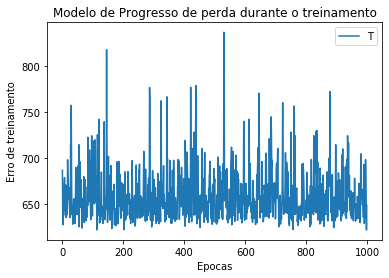

In [25]:
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.title('Modelo de Progresso de perda durante o treinamento')
plt.xlabel('Epocas')
plt.ylabel('Erro de treinamento')
plt.legend('Training loss')
model.get_weights()

In [28]:
temp = 5
revenue = model.predict([temp])
print('Revenue Predictions Using Training ANN', revenue)

Revenue Predictions Using Training ANN [[153.07959]]


Text(0.5, 1.0, 'Revenue Generated by Temperature increase')

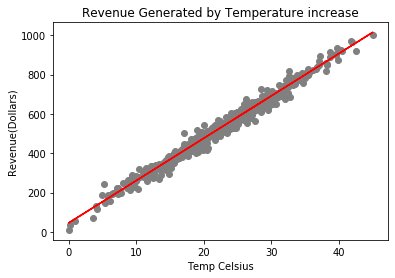

In [31]:
plt.scatter(x_train, y_train, color='gray')
plt.plot(x_train, model.predict(x_train), color='red')
plt.ylabel('Revenue(Dollars)')
plt.xlabel('Temp Celsius')
plt.title('Revenue Generated by Temperature increase')

In [0]:
x_train.shape
x_train = x_train.values.reshape(-1, 1)
x_train.shape


In [40]:
y_train.shape

(500,)

In [0]:
y_train = y_train.values.reshape(-1, 1)

In [44]:
y_train.shape

(500, 1)

In [45]:
from sklearn.linear_model import LinearRegression  # Fazendo a regressao linear com o sklearn para comparar com a rede neural
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
regressor.coef_  # Coeficiente de peso

array([[21.44362551]])

In [48]:
regressor.intercept_

array([44.83126709])

Text(0.5, 1.0, 'Revenue Generated by Temperature increase')

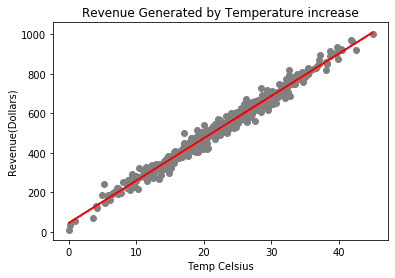

In [49]:
plt.scatter(x_train, y_train, color='gray')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.ylabel('Revenue(Dollars)')
plt.xlabel('Temp Celsius')
plt.title('Revenue Generated by Temperature increase')

In [52]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Training ANN', revenue)

Revenue Predictions Using Training ANN [[152.04939464]]
